In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import json
import seaborn as sns
import pareto
import math

In [2]:
### check if in WSL (for Andrew) and if so, add font location
from platform import uname
if 'Microsoft' in uname().release:
  import matplotlib.font_manager as font_manager
  font_dirs = ['/mnt/c/Windows/Fonts/', ]
  font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
  for font_file in font_files:
    font_list = font_manager.fontManager.addfont(font_file)

## set default font type/size
rcParams['font.family'] = 'Arial'
rcParams.update({'font.size': 8})

In [3]:
### wes anderson color pallettes from r
pal_rushmore_8 = ["#E1BD6D", "#E6BD83", "#CAB38C", "#4A8B6D", "#166058", "#2E324C", "#852A30", "#F2300F"]
pal_zissou1_5 = ["#3B9AB2", "#78B7C5", "#EBCC2A", "#E1AF00", "#F21A00"]
pal_cav1_5 = ["#D8B70A", "#02401B", "#A2A475", "#81A88D", "#972D15"]
pal_iod1_6 = ["#9986A5", "#79402E", "#CCBA72", "#0F0D0E", "#D9D0D3", "#8D8680"]
pal_cb = ['#7570b3', '#1b9e77', '#d95f02']

## color & marker by hydro/project
projects = ['FKC','CFWB','FKC_CFWB']
hydros = ['dry','median','wet']
categories_dict = {'project': projects, 'hydro': hydros}
cmap = cm.get_cmap('viridis')
# cdict_project = {'FKC': pal_rushmore_8[0], 'CFWB': pal_rushmore_8[3], 'FKC_CFWB': pal_rushmore_8[5]}
cdict_project = {'FKC': '0.8', 'CFWB': '0.7', 'FKC_CFWB': '0.6'}
# cdict_hydro = {'wet': pal_rushmore_8[4], 'median': pal_rushmore_8[2], 'dry': pal_rushmore_8[6]}
cdict_hydro = {'wet': pal_zissou1_5[0], 'median': pal_zissou1_5[2], 'dry': pal_zissou1_5[4]}
# cdict_hydro = {'wet': pal_cb[0], 'median': pal_cb[1], 'dry': pal_cb[2]}
cdict_categories_dict = {'project':cdict_project, 'hydro':cdict_hydro}
mdict_project = {'FKC': 's', 'FKC_CFWB':'v', 'CFWB': 'o'}
mdict_hydro = {'wet': 'v', 'median': 'o', 'dry': '*'}
ldict_project = {'FKC': 'Canal', 'FKC_CFWB':'Both', 'CFWB': 'Bank'}
ldict_hydro = {'wet': 'Wet', 'median': 'Avg', 'dry': 'Dry'}

In [4]:
### get inflow data
df_list = []
filpaths = ['calfews_src/data/input/calfews_src-data-sim.csv', 
            'calfews_src/data/capow_synthetic/capow_synthetic_50yr_wet.csv',
            'calfews_src/data/capow_synthetic/capow_synthetic_50yr_median.csv', 
            'calfews_src/data/capow_synthetic/capow_synthetic_50yr_dry.csv']
for n in range(101):
    filpaths.append('calfews_src/data/capow_synthetic/ORCA_forecast_flows' + str(n) + '.csv')
names = ['Historical', 'Wet', 'Avg.', 'Dry']
dates = [['19051001','20160930'], ['19051001','19560929'], ['19051001','19560929'], ['19051001','19560929']]
colors = ['k', cdict_hydro['wet'], cdict_hydro['median'], cdict_hydro['dry']]
alphas = [0.8,0.8,0.8,0.8]
zorders = [3,2,2,2]

for i, filpath in enumerate(filpaths):
    df = pd.read_csv(filpath)
    df.index = pd.date_range(dates[min(i,3)][0], dates[min(i,3)][1],freq='D')
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['wy'] = df.index.year
    df['wy'].loc[df['month'] >= 10] += 1
    ### get aggregated flows
    df['local_fnf'] = df['PFT_fnf'] + df['KWH_fnf'] + df['SUC_fnf'] + df['ISB_fnf']
    df['delta_fnf'] = df['ORO_fnf'] + df['SHA_fnf'] + df['FOL_fnf'] + df['YRS_fnf']
    df['SSJB_fnf'] = df['MIL_fnf'] + df['local_fnf']
    
    df_list.append(df)
    colors.append('0.7')
    alphas.append(0.8)
    zorders.append(1)
    

/home/andrew/projects/CALFEWS/.venv_calfews2/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/andrew/projects/CALFEWS/.venv_calfews2/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/andrew/projects/CALFEWS/.venv_calfews2/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/andrew/projects/CALFEWS/.venv_calfews2/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/andrew/projects/CALFEWS/.venv_calfews2/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/andrew/projects/CALFEWS/.venv_calfews2/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/andrew/projects/CALFEWS/.venv_calfews2/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/andrew/projects/CALFEWS/.venv_calfews2/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/andrew/projects/CALFEWS/.venv_calfews2/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/andrew/projects/CALFEWS/.venv_calfews2/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/andrew/projects/CALFEWS/.venv_calfews2/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/andrew/projects/CALFEWS/.venv_calfews2/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

/home/andrew/projects/CALFEWS/.venv_calfews2/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/andrew/projects/CALFEWS/.venv_calfews2/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/andrew/projects/CALFEWS/.venv_calfews2/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

In [12]:
reservoir = 'local'

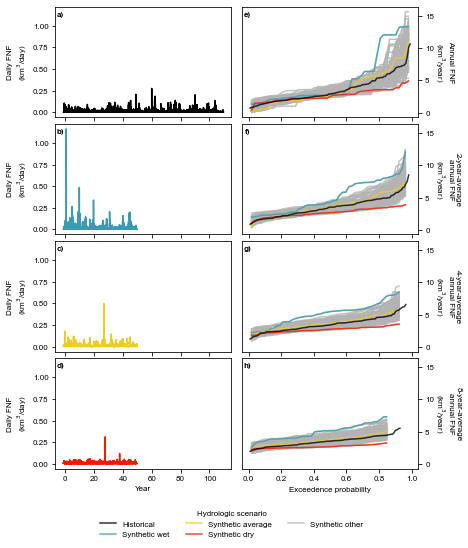

In [13]:
### subplots with different exceedence curves for MIL_fnf
fig,axs = plt.subplots(4,2,figsize=(6.5,8.5), gridspec_kw={'hspace':0.06, 'wspace':0.06}, sharex='col', sharey='col')
labels = [['a)','b)','c)','d)'], ['e)','f)','g)','h)']]

km3_conversion = 1.23/1e6  ### convert from acre-feet to km3

### daily flows
for i, df in enumerate(df_list[:4]):
    ### plot flow
    ax = axs[i,0]
    ax.plot(df[reservoir + '_fnf'] * km3_conversion, color=colors[i])
    ax.set_xticks(pd.date_range(start = "1906", end = "2016", freq = "20Y"))
    ax.set_xticklabels(np.arange(0, 111, 20))
    ax.set_ylabel('Daily FNF\n(km$^3$/day)')
    ax.annotate(labels[0][i], xy=(0.03,0.93), xycoords='axes fraction', ha='center', va='center', weight='bold')

### multi-annual exceedances
for i, df in enumerate(df_list):
    
    ### plot annual-sum flow exceedance curves
    ax = axs[0,1]
    flow = df.groupby('wy').sum()[reservoir + '_fnf'].values * km3_conversion
    flow = np.sort(flow)
    p_exc = [(1+i) / (len(flow) + 1) for i in range(len(flow))]
    ax.plot(p_exc, flow, color=colors[i], alpha=alphas[i], zorder=zorders[i])
    ax.yaxis.set_label_position('right') 
    ax.yaxis.tick_right()
    ax.set_ylabel('Annual FNF\n(km$^3$/year)', rotation=270, labelpad=20)
    
    ### plot 2yr-sum flow exceedance curves
    ax = axs[1,1]
    flow = df.groupby('wy').sum().rolling(2).sum()[reservoir + '_fnf'].values / 2 * km3_conversion
    flow = np.sort(flow)
    p_exc = [(1+i) / (len(flow) + 1) for i in range(len(flow))]
    ax.plot(p_exc, flow, color=colors[i], alpha=alphas[i], zorder=zorders[i])  
    ax.yaxis.set_label_position('right') 
    ax.yaxis.tick_right()
    ax.set_ylabel('2-year-average\nannual FNF\n(km$^3$/year)', rotation=270, labelpad=27)
    
    ### plot 5yr-sum flow exceedance curves
    ax = axs[2,1]
    flow = df.groupby('wy').sum().rolling(4).sum()[reservoir + '_fnf'].values / 4 * km3_conversion
    flow = np.sort(flow)
    p_exc = [(1+i) / (len(flow) + 1) for i in range(len(flow))]
    ax.plot(p_exc, flow, color=colors[i], alpha=alphas[i], zorder=zorders[i])  
    ax.yaxis.set_label_position('right') 
    ax.yaxis.tick_right()
    ax.set_ylabel('4-year-average\nannual FNF\n(km$^3$/year)', rotation=270, labelpad=27)
    
    ### plot 10yr-sum flow exceedance curves
    ax = axs[3,1]
    flow = df.groupby('wy').sum().rolling(8).sum()[reservoir + '_fnf'].values / 8 * km3_conversion
    flow = np.sort(flow)
    p_exc = [(1+i) / (len(flow) + 1) for i in range(len(flow))]
    ax.plot(p_exc, flow, color=colors[i], alpha=alphas[i], zorder=zorders[i])      
    ax.yaxis.set_label_position('right') 
    ax.yaxis.tick_right()
    ax.set_ylabel('8-year-average\nannual FNF\n(km$^3$/year)', rotation=270, labelpad=27)
    
for row in range(4):
    axs[row,1].annotate(labels[1][row], xy=(0.03,0.93), xycoords='axes fraction', ha='center', va='center', weight='bold')
    
axs[3,0].set_xlabel('Year')
axs[3,1].set_xlabel('Exceedence probability')
    
leg_proj = [Line2D([0],[0], color=colors[0], alpha=alphas[0], label='Historical'),
            Line2D([0],[0], color=colors[1], alpha=alphas[1], label='Synthetic wet'),
            Line2D([0],[0], color=colors[2], alpha=alphas[2], label='Synthetic average'),
            Line2D([0],[0], color=colors[3], alpha=alphas[3], label='Synthetic dry'),
            Line2D([0],[0], color=colors[4], alpha=alphas[4], label='Synthetic other'),]
leg1 = axs[3,0].legend(handles=leg_proj, loc='center', bbox_to_anchor=(1,-0.5), title='Hydrologic scenario', ncol=3, frameon=False)
leg1.get_title().set_ma('center')
    
figname = 'inflow_exceedances_' + reservoir
plt.savefig('figures/' + figname + '.png', bbox_inches='tight', dpi=300)    

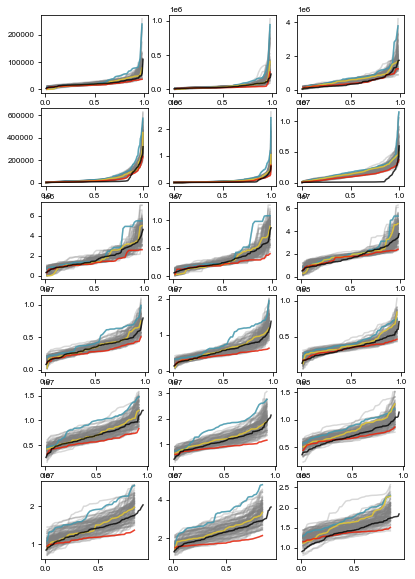

In [163]:
# ### subplots with different exceedence curves for MIL, local, delta
# fig,axs = plt.subplots(6,3,figsize=(6.5,10))
# for i, df in enumerate(df_list):   
#     for col, reservoir in enumerate(['MIL', 'local', 'delta']):
#         ### plot annual-max flow exceedance curves
#         ax = axs[0,col]
#         flow = df.groupby('wy').max()[reservoir + '_fnf'].values
#         flow = np.sort(flow)
#         p_exc = [(1+i) / (len(flow) + 1) for i in range(len(flow))]
#         ax.plot(p_exc, flow, color=colors[i], alpha=alphas[i], zorder=zorders[i])

#         ### plot annual-weekly-max flow exceedance curves
#         ax = axs[1,col]
#         flow = df.rolling(7).sum().groupby('wy').max()[reservoir + '_fnf'].values
#         flow = np.sort(flow)
#         p_exc = [(1+i) / (len(flow) + 1) for i in range(len(flow))]
#         ax.plot(p_exc, flow, color=colors[i], alpha=alphas[i], zorder=zorders[i])    

#         ### plot annual-sum flow exceedance curves
#         ax = axs[2,col]
#         flow = df.groupby('wy').sum()[reservoir + '_fnf'].values
#         flow = np.sort(flow)
#         p_exc = [(1+i) / (len(flow) + 1) for i in range(len(flow))]
#         ax.plot(p_exc, flow, color=colors[i], alpha=alphas[i], zorder=zorders[i])

#         ### plot 2yr-sum flow exceedance curves
#         ax = axs[3,col]
#         flow = df.groupby('wy').sum().rolling(2).sum()[reservoir + '_fnf'].values
#         flow = np.sort(flow)
#         p_exc = [(1+i) / (len(flow) + 1) for i in range(len(flow))]
#         ax.plot(p_exc, flow, color=colors[i], alpha=alphas[i], zorder=zorders[i])  

#         ### plot 5yr-sum flow exceedance curves
#         ax = axs[4,col]
#         flow = df.groupby('wy').sum().rolling(4).sum()[reservoir + '_fnf'].values
#         flow = np.sort(flow)
#         p_exc = [(1+i) / (len(flow) + 1) for i in range(len(flow))]
#         ax.plot(p_exc, flow, color=colors[i], alpha=alphas[i], zorder=zorders[i])  

#         ### plot 10yr-sum flow exceedance curves
#         ax = axs[5,col]
#         flow = df.groupby('wy').sum().rolling(8).sum()[reservoir + '_fnf'].values
#         flow = np.sort(flow)
#         p_exc = [(1+i) / (len(flow) + 1) for i in range(len(flow))]
#         ax.plot(p_exc, flow, color=colors[i], alpha=alphas[i], zorder=zorders[i])      
    
    
# figname = 'inflow_exceedances'
# plt.savefig('figures/' + figname + '.png', bbox_inches='tight', dpi=300)    